In [62]:
%matplotlib widget
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import astropy.units as u
from astropy import constants as const
from astropy.io import fits

In [63]:
fitspath = '/Users/pierpaolo/SciSoft/musevenv/lib/python3.11/site-packages/fantasy_agn/eigen/qso_eigenspec_Yip2004_global.fits'
qso =  fits.open(fitspath)[1].data

In [64]:
fits.open(fitspath)[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =              1053456 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [65]:
qso

FITS_rec([([ 900.  ,  902.75,  905.5 , ..., 7992.25, 7995.  , 7997.75], [[ 1.80970e-02,  1.92030e-02,  1.88190e-02, ...,  8.22400e-03,  7.97100e-03,  8.70200e-03], [-3.29070e-02, -3.43700e-02, -3.37200e-02, ...,  2.28410e-02,  2.21380e-02,  2.41460e-02], [ 3.86400e-02,  4.09210e-02,  4.06070e-02, ...,  1.64380e-02,  1.59310e-02,  1.73750e-02], ..., [-3.56100e-03, -1.55220e-02, -1.19220e-02, ...,  2.33500e-03,  2.15200e-03,  2.35600e-03], [ 4.90230e-02,  3.87580e-02,  4.52690e-02, ..., -1.48200e-03, -1.29100e-03, -1.58400e-03], [-1.17860e-02, -1.91230e-02, -1.81740e-02, ..., -5.42100e-03, -4.95300e-03, -5.58600e-03]])],
         dtype=(numpy.record, [('WAVE', '>f8', (2582,)), ('PCA', '>f8', (50, 2582))]))

In [66]:
qso['WAVE'].shape

(1, 2582)

In [67]:
qso['PCA'].shape

(1, 50, 2582)

In [68]:
len(qso['PCA'][0])

50

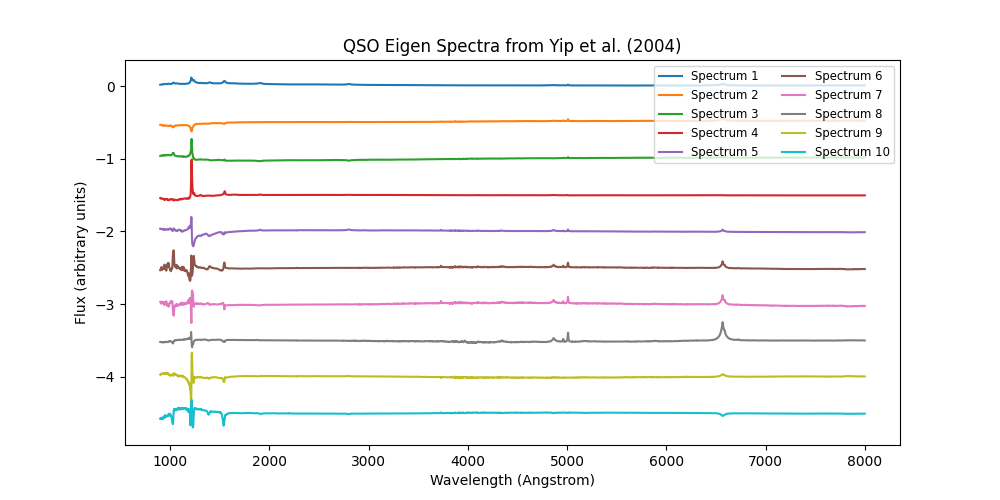

In [69]:
# Plot all the spectra
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(len(qso['PCA'][0])-40):
    ax.plot(qso['WAVE'][0], qso['PCA'][0][i].reshape(-1)-(0.5*i), label=f'Spectrum {i+1}')
ax.set_xlabel('Wavelength (Angstrom)')
ax.set_ylabel('Flux (arbitrary units)')
ax.set_title('QSO Eigen Spectra from Yip et al. (2004)')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.show()

In [70]:
from astropy.io import fits
import numpy as np

wave = qso['WAVE'][0]  # shape: (2582,)
pca = qso['PCA'][0]

# Save as an image HDU (primary: wave, extension: PCA)
hdu_wave = fits.PrimaryHDU(wave)
hdu_wave.header['EXTNAME'] = 'WAVE'
hdu_pca = fits.ImageHDU(pca, name='PCA')
hdul = fits.HDUList([hdu_wave, hdu_pca])
hdul.writeto('reshaped_pca.fits', overwrite=True)



In [71]:
new_qso = fits.open('reshaped_pca.fits')
new_qso.info()

Filename: reshaped_pca.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU       6   (2582,)   float64   
  1  PCA           1 ImageHDU         8   (2582, 50)   float64   


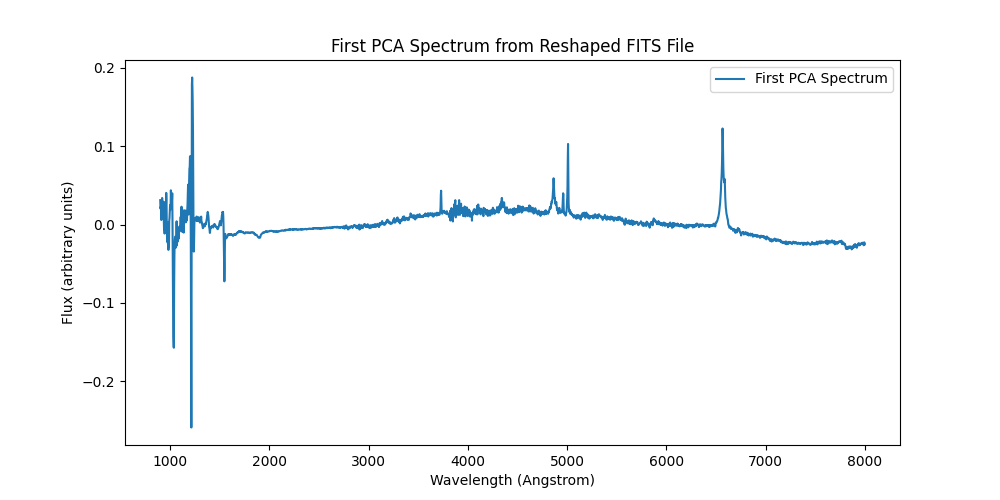

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(new_qso[0].data, new_qso[1].data[6], label='First PCA Spectrum')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (arbitrary units)')
plt.title('First PCA Spectrum from Reshaped FITS File')
plt.legend()
plt.show()

In [73]:
# Lets now do the same with the Galaxy Eigenspectra
fitspath_galaxy = '/Users/pierpaolo/SciSoft/musevenv/lib/python3.11/site-packages/fantasy_agn/eigen/gal_eigenspec_Yip2004.fits'
galaxy = fits.open(fitspath_galaxy)[1].data

In [74]:
wave_galaxy = galaxy['WAVE'][0]  # shape: (2582,)
pca_galaxy = galaxy['PCA'][0]

# Save as an image HDU (primary: wave, extension: PCA)
hdu_wave_galaxy = fits.PrimaryHDU(wave_galaxy)
hdu_wave_galaxy.header['EXTNAME'] = 'WAVE'
hdu_pca_galaxy = fits.ImageHDU(pca_galaxy, name='PCA')
hdul_galaxy = fits.HDUList([hdu_wave_galaxy, hdu_pca_galaxy])
hdul_galaxy.writeto('reshaped_pca_galaxy.fits', overwrite=True)

In [75]:
new_galaxy = fits.open('reshaped_pca_galaxy.fits')
new_galaxy.info()


Filename: reshaped_pca_galaxy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU       6   (3839,)   float64   
  1  PCA           1 ImageHDU         8   (3839, 10)   float64   


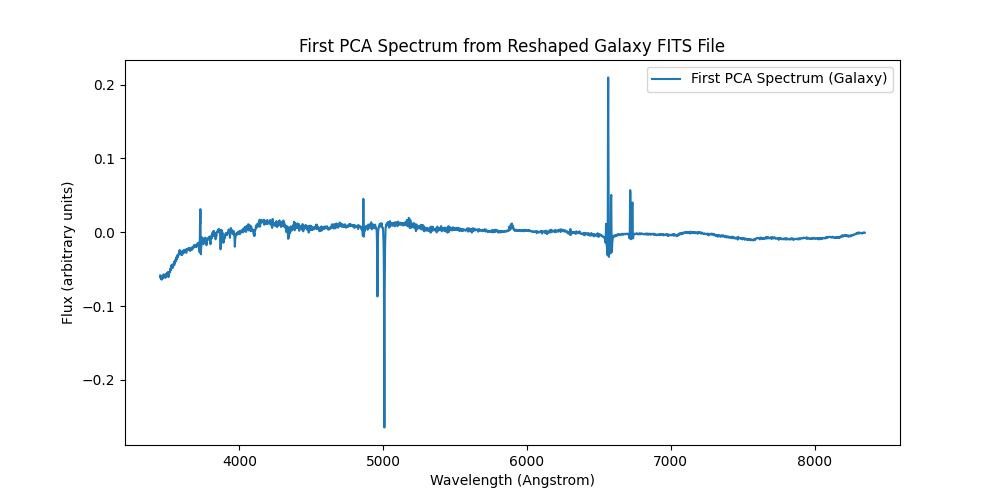

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(new_galaxy[0].data, new_galaxy[1].data[5], label='First PCA Spectrum (Galaxy)')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (arbitrary units)')
plt.title('First PCA Spectrum from Reshaped Galaxy FITS File')
plt.legend()
plt.show()

In [78]:
np.min(wave_galaxy), np.max(wave_galaxy)

(3450.0, 8348.700195)

In [79]:
np.min(new_qso[0].data), np.max(new_qso[0].data)

(900.0, 7997.75)

In [80]:
# Check if qso or galaxy spetra contains nans
np.isnan(new_qso[1].data).any(), np.isnan(new_galaxy[1].data).any()

(False, False)